## <center>Assignment 6: Fourier Transform</center>
#### <center>Gaukhar Dauzhan</center>

In [1]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T=1.0

We are going to generate the values of function $$y=sin(\frac{2\Pi}{T}t),$$ at descrete equidistant points $t_k=k \Delta t$ covering $N_p$ periods with $N_0$ equdistant points in each period

In [3]:
def genFunction(Np, N0, seed):   
    rn.seed(seed)
    N=Np*N0
    y=np.zeros(N, float)
    t=np.zeros(N, float)
    for i in range (N):
        dt=T/N0
        t[i]=i*dt
        y[i]=np.sin((2*np.pi*t[i])/T)
    return t, y, N


Add random noise of amplitude A to each of these points:

In [4]:
def addNoise(y, A):
    yn=np.copy(y)
    n=yn.size
    for i in range(n):
        yn[i]+=(rn.random()*2-1)*A
    return yn

Perform Fourier transform of the data using Fast Fourier transform algorithm:

In [5]:
def FFT(y, toReverse):
    N=y.size
    if (N==1):
        return y
    angle=-2*np.pi/N
    if (toReverse):
        angle*=-1
    W=np.cos(angle)+np.sin(angle)*1j
    J=int(N/2)
    n=np.arange(0, J)
    g=y[0:J]+y[J:N]
    h=(y[0:J]-y[J:N])*(W**n)
    yf=np.zeros(N, complex)
    yf[0::2]=FFT(g, toReverse)
    yf[1::2]=FFT(h, toReverse)
    return yf


Remove noise from the resulting data:

In [6]:
def removeNoise(fn):
    frn=np.copy(fn)
    n=fn.size
    max1 = 0
    max2 = 0
    for i in range (n):
        if abs(frn[i]) > max1:
            max2 = max1
            max1 = abs(frn[i])
        elif abs(frn[i]) > max2:
            max2 = abs(frn[i])
    for i in range(n):
        if abs(frn[i])<max2:
            frn[i] = 0
    return frn

Perform inverse Fourier transform of the filtered data:

In [7]:
def reverseF(frn):
    return FFT(frn, 1)/frn.size

Compare the resulting function with the original one and with the one with random noise in it:

In [8]:
def compare(y1, y2):
    n=y1.size
    error= np.sqrt(np.sum(np.square(y1-y2))/n)
    return error.real**2+error.imag**2

Apply each of the steps to the data:

In [85]:
def analyzeData(Np, N0, A, seed, plotGraph):
    t, y, N=genFunction(Np, N0, seed)
    yn=addNoise(y, A)
    S=np.zeros(N)
    for k in range (N):
        S[k]=k/(N/N0)
    fn=FFT(yn, 0)
    #plt.plot(range(yn.size), abs(fn))
    #plt.show()
    frn=removeNoise(fn)
    #plt.plot(range(yn.size), abs(frn))
    #plt.show()
    yr=reverseF(frn)
    if (plotGraph):
        plt.figure(figsize=(12,10))
        plt.subplots_adjust(hspace=.5)
        plt.subplot(3, 2, 1)
        plt.title("Np = %s, N0 = %s, A = %s "%(Np, N0, A ))

        plt.ylabel("y")
        plt.xlabel("time")
        plt.plot(S, yr.real)
        plt.plot(S, y)

        plt.subplot(3, 2, 2)
        plt.title("Np = %s, N0 = %s, A = %s "%(Np, N0, A))
        plt.ylabel("y")
        plt.xlabel("time")
        plt.plot(S, yr.real)
        plt.plot(S, yn)
        plt.show()
    else:
        return compare(yr, y)
    

### <center>Comparison with original function and data with noise</center>

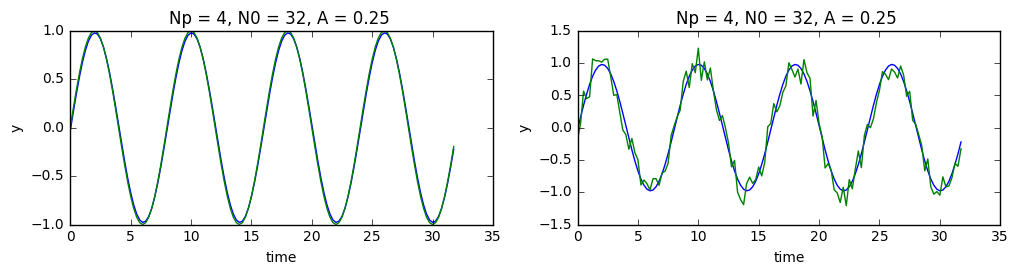

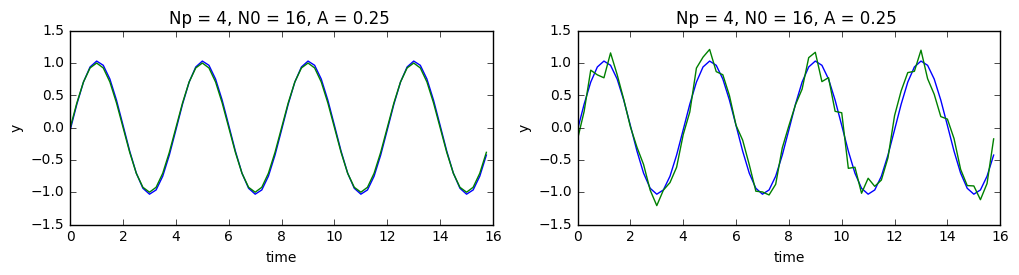

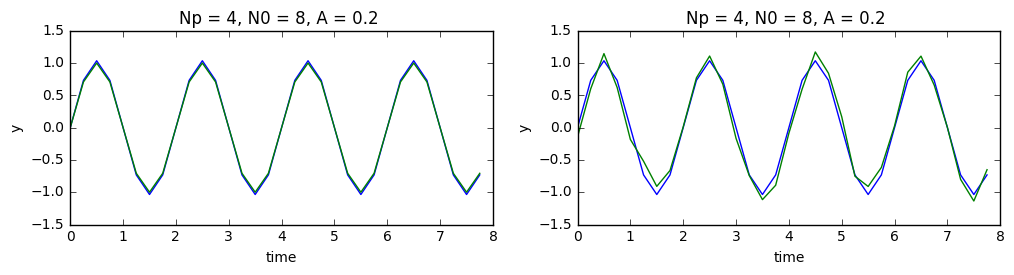

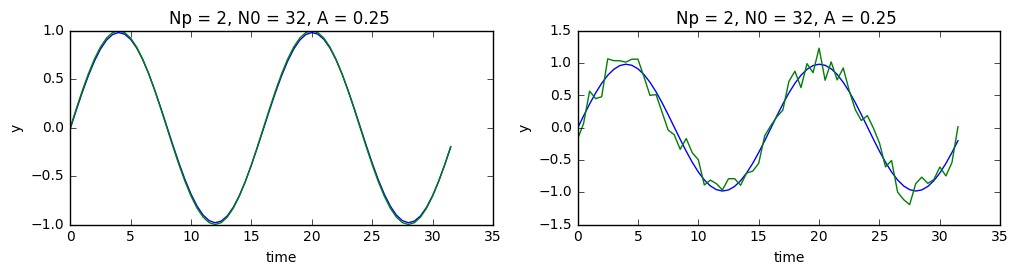

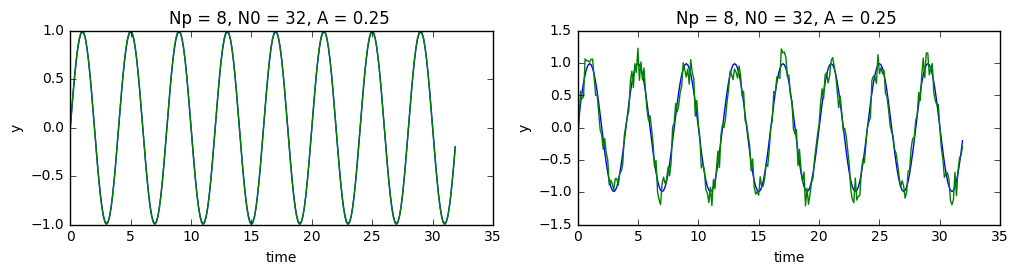

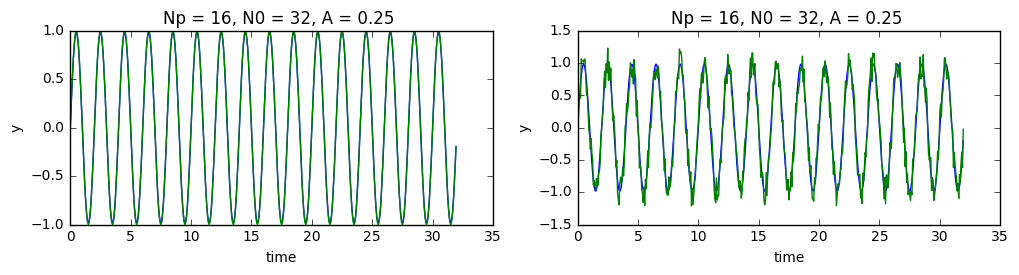

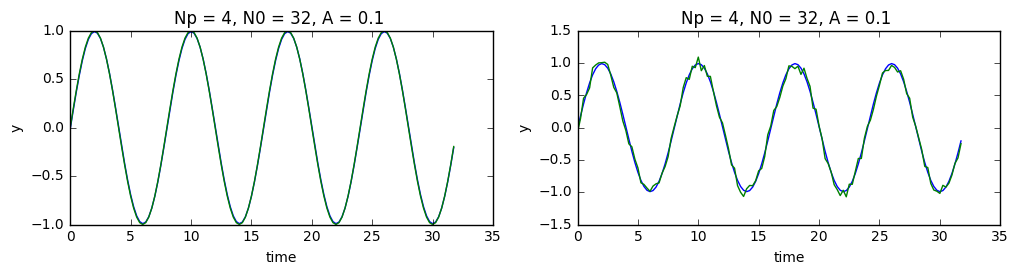

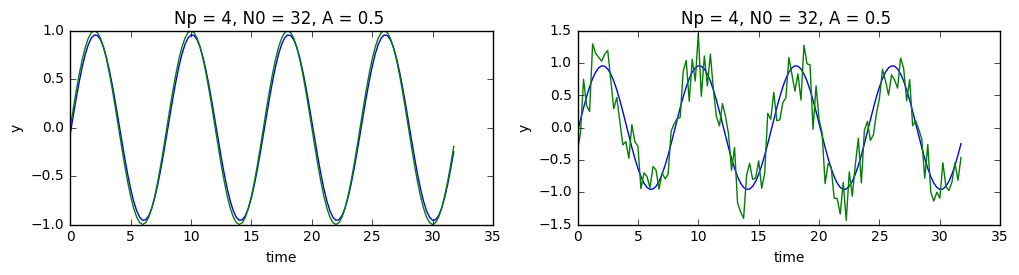

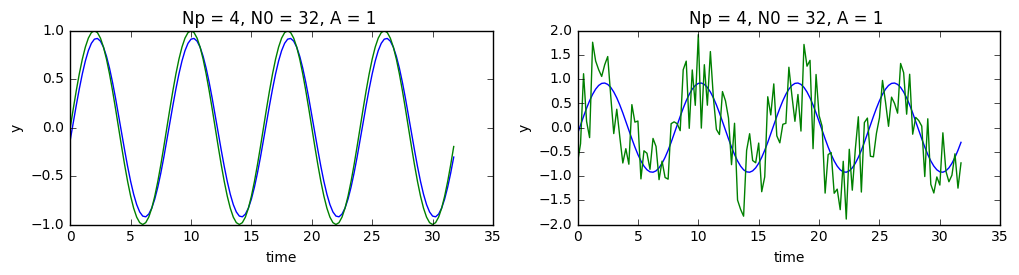

In [86]:
analyzeData(4, 32, 0.25, "seed", 1)
analyzeData(4, 16, 0.25,  "seed", 1)
analyzeData(4, 8, 0.2,  "seed", 1)
analyzeData(2, 32, 0.25, "seed",  1)
analyzeData(8, 32, 0.25, "seed",  1)
analyzeData(16, 32, 0.25, "seed",  1)
analyzeData(4, 32, 0.1, "seed",  1)
analyzeData(4, 32, 0.5, "seed",  1)
analyzeData(4, 32, 1, "seed",  1)

In order to get more accurate results (clearer dependency of error on different parameters), we can apply Fast Fourier Transform algorithm to 10 different datasets and compute the error in each case

In [58]:
seed_errors=np.zeros((10, 9), float)
for i in range (10):
    seed_errors[i, 0]=analyzeData(4, 8, 0.25, i, 0)
    seed_errors[i, 1]=analyzeData(4, 16, 0.25,  i, 0)
    seed_errors[i, 2]=analyzeData(4, 32, 0.2,  i, 0)
    seed_errors[i, 3]=analyzeData(2, 32, 0.25, i,  0)
    seed_errors[i, 4]=analyzeData(8, 32, 0.25, i,  0)
    seed_errors[i, 5]=analyzeData(16, 32, 0.25, i,  0)
    seed_errors[i, 6]=analyzeData(4, 32, 0.1, i,  0)
    seed_errors[i, 7]=analyzeData(4, 32, 0.5, i,  0)
    seed_errors[i, 8]=analyzeData(4, 32, 1, i,  0)

In [59]:
ave_errors=np.average(seed_errors, axis=0)

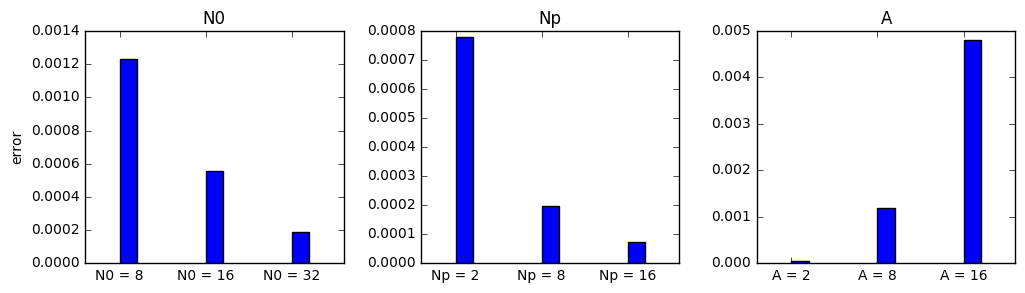

In [84]:
plt.figure(figsize = (12, 3))
plt.subplots_adjust(wspace=0.3)
b = [2.8, 4.8, 6.8]
x=["N0 = 8", "N0 = 16", "N0 = 32"]
plt.subplot(131)
plt.title("N0")
plt.ylabel('error')
plt.bar(b, ave_errors[0:3], width=0.4, tick_label=x)

plt.subplot(132)
x=["Np = 2", "Np = 8", "Np = 16"]
plt.title("Np")
plt.bar(b, ave_errors[3:6], width=0.4, tick_label=x)

plt.subplot(133)
x=["A = 2", "A = 8", "A = 16"]
plt.title("A")
plt.bar(b, ave_errors[6:9], width=0.4, tick_label=x)
plt.show()

<b>It can be seen from the graphs that as we increase values of $N_p$ or $N_0$, we get less error. In opposite, as we add more noise to the function, we get a bigger error, i.e. our filtered data differs more considerably from the original function.</b>